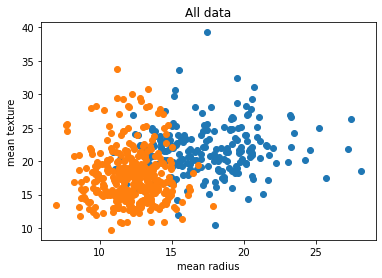

In [15]:

from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt


data= load_breast_cancer()
Data= data['data']
outputs= data['target']
outputsNames= data['target_names']
featureNames= list(data['feature_names'])

features1=[ feat[featureNames.index('mean radius')] for feat in Data]
features2= [feat[featureNames.index('mean texture')] for feat in Data]
inputs=[[feat[featureNames.index('mean radius')],feat[featureNames.index('mean texture')]] for feat in Data]
labels = set(outputs) 

for crtLabel in labels:
    x=[features1[i] for i in range(len(Data)) if crtLabel==outputs[i]]
    y=[features2[i] for i in range(len(Data)) if crtLabel==outputs[i]]
    plt.scatter(x,y,label=outputsNames[crtLabel])
    
plt.title('All data')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()



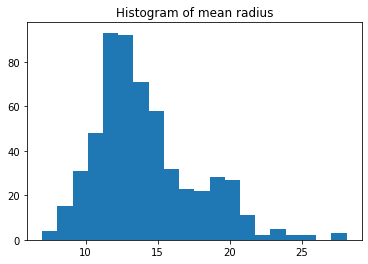

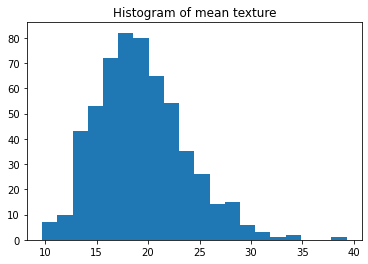

In [16]:

def plotHistogram(x,variabName):
    n,bins,patches=plt.hist(x,20)
    plt.title('Histogram of '+ variabName)
    plt.show()


plotHistogram(features1,'mean radius')
plotHistogram(features2,'mean texture')


In [17]:
import numpy as np

np.random.seed(5)

indexes=[i for i in range(len(Data))]

trainSamples=np.random.choice(indexes, int(0.8*len(indexes)), replace=False)
testSamples=[i for i in indexes if not i in trainSamples]

trainInputs=[inputs[i] for i in trainSamples]
trainOutputs=[outputs[i] for i in trainSamples]

testInputs=[inputs[i] for i in testSamples]
testOutputs=[outputs[i] for i in testSamples]

feature_1_in_train=[t[0] for t in trainInputs]
feature_2_in_train=[t[1] for t in trainInputs]
feature_1_in_test=[t[0] for t in testInputs]
feature_2_in_test=[t[1] for t in testInputs]


In [18]:

def plotDataClassification_1(features1,features2,title=None):
    
    labels=set(outputs)
    
    for crtLabel in labels:
        x=[features1[i] for i in range(len(features1)) if crtLabel==outputs[i]]
        y=[features2[i] for i in range(len(features1)) if crtLabel==outputs[i]]
        plt.scatter(x,y,label=outputsNames[crtLabel])
    plt.title(title)
    plt.legend()
    plt.show()
    

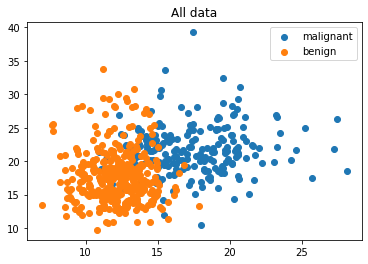

In [19]:
plotDataClassification_1(features1,features2,'All data')

In [20]:
from sklearn.preprocessing import StandardScaler

def normalisation(trainData,testData):
    scaler=StandardScaler()
    
    if not isinstance(trainData[0],list):
        trainData=[[el] for el in trainData]
        testData=[[el] for el in testData]
        
        scaler.fit(trainData)
        
        normalisedTrainData= scaler.transform(trainData)
        normalisedTestData= scaler.transform(testData)
        
        normalisedTrainData=[el[0] for el in normalisedTrainData]
        normalisedTestData=[el[0] for el in normalisedTestData]
        
    else:
        scaler.fit(trainData)
        normalisedTrainData= scaler.transform(trainData)
        normalisedTestData= scaler.transform(testData)
        
    return normalisedTrainData,normalisedTestData
    

In [21]:

def normalisation_score01(feature):
    val_min=min(feature)
    val_max=max(feature)
    normalised=[(feat-val_min)/(val_max-val_min) for feat in feature]
    return normalised


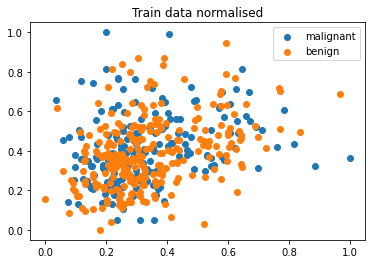

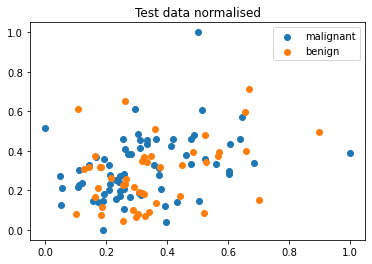

In [22]:

features1_train_n= normalisation_score01(feature_1_in_train)
features2_train_n= normalisation_score01(feature_2_in_train)

features1_test_n= normalisation_score01(feature_1_in_test)
features2_test_n= normalisation_score01(feature_2_in_test)

trainInputs=[[f1,f2] for f1,f2 in zip(features1_train_n,features2_train_n)]
testInputs=[[f1,f2] for f1,f2 in zip(features1_test_n,features2_test_n)]

plotDataClassification_1(features1_train_n,features2_train_n,title='Train data normalised')
plotDataClassification_1(features1_test_n,features2_test_n,title='Test data normalised')

In [23]:

from sklearn import linear_model

regressor_1= linear_model.LogisticRegression()

regressor_1.fit(trainInputs,trainOutputs)

from MyLogisticRegression import MyLogisticRegression

regressor_2= MyLogisticRegression()

regressor_2.fit(trainInputs,trainOutputs)

computedOutputs_1= regressor_1.predict(testInputs)

computedOutputs_2=regressor_2.predict(testInputs)

print("Tool Logistic Regressor: f(x)= ", regressor_1.intercept_[0]," + ", regressor_1.coef_[0][0]," * x1 + ",regressor_1.coef_[0][1]," * x2")
print("Manual Logistic Regressor: f(x)= ", regressor_2.intercept_," + ", regressor_2.coef_[0]," * x1 + ",regressor_2.coef_[1]," * x2")


Tool Logistic Regressor: f(x)=  4.549526458226949  +  -7.90980946963083  * x1 +  -2.8899548897711553  * x2
Manual Logistic Regressor: f(x)=  12.393735074414556  +  -27.503658874942342  * x1 +  -6.035278694611186  * x2


In [24]:
def plotPredictions(feature1, feature2,computedOutputs ,realOutputs,title=None):
    
    labels = list(set(outputs))
    noData = len(feature1)
    for crtLabel in labels:
        
        x = [feature1[i] for i in range(noData) if realOutputs[i] == crtLabel and computedOutputs[i] == crtLabel ]
        y = [feature2[i] for i in range(noData) if realOutputs[i] == crtLabel and computedOutputs[i] == crtLabel]
        plt.scatter(x, y, label = outputsNames[crtLabel] + ' (correct)')
    for crtLabel in labels:
        x = [feature1[i] for i in range(noData) if realOutputs[i] == crtLabel and computedOutputs[i] != crtLabel ]
        y = [feature2[i] for i in range(noData) if realOutputs[i] == crtLabel and computedOutputs[i] != crtLabel]
        plt.scatter(x, y, label = outputsNames[crtLabel] + ' (incorrect)')
        
    plt.xlabel('mean radius')
    plt.ylabel('mean texture')
    plt.legend()
    plt.title(title)
    plt.show()

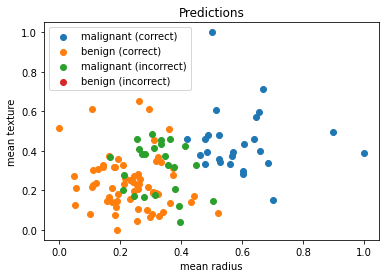

In [25]:

plotPredictions(features1_test_n,features2_test_n,computedOutputs_1,testOutputs,'Predictions')

In [26]:
from sklearn.metrics import mean_squared_error

def accuracy_error(computedOutputs,realOutputs):
    error=0.0
    
    for t1,t2 in zip(computedOutputs,realOutputs):
        if(t1!=t2):
            error+=1
    error/=len(computedOutputs)
    
    print("accuracy error(manual): ",error)
    
    error=mean_squared_error(realOutputs,computedOutputs)
    
    print("accuracy error(tool): ",error)


In [27]:
print("Tool Logistic Regressor Accuracy Error: ")
accuracy_error(computedOutputs_1,testOutputs)
print("Manual Logistic Regressor Accuracy Error: ")
accuracy_error(computedOutputs_2,testOutputs)

Tool Logistic Regressor Accuracy Error: 
accuracy error(manual):  0.21052631578947367
accuracy error(tool):  0.21052631578947367
Manual Logistic Regressor Accuracy Error: 
accuracy error(manual):  0.21052631578947367
accuracy error(tool):  0.21052631578947367
